位置为20.3241时：
正向平均位置偏差为：0.02
反向平均位置偏差为：-0.1
平均双向位置偏差：-0.04
正向标准不确定度为：0.044721359549995794
反向标准不确定度为：0.0
双向重复定位精度：0.2094427190999916
位置为20.9057时：
正向平均位置偏差为：0.12
反向平均位置偏差为：-0.04
平均双向位置偏差：0.039999999999999994
正向标准不确定度为：0.08366600265340757
反向标准不确定度为：0.05477225575051662
双向重复定位精度：0.43687651680784834
位置为21.4597时：
正向平均位置偏差为：0.18
反向平均位置偏差为：-0.06000000000000001
平均双向位置偏差：0.05999999999999999
正向标准不确定度为：0.044721359549995794
反向标准不确定度为：0.05477225575051661
双向重复定位精度：0.4389872306010248
位置为21.9883时：
正向平均位置偏差为：0.06000000000000001
反向平均位置偏差为：-0.06000000000000001
平均双向位置偏差：0.0
正向标准不确定度为：0.05477225575051661
反向标准不确定度为：0.05477225575051661
双向重复定位精度：0.33908902300206645
位置为22.4933时：
正向平均位置偏差为：0.13999999999999999
反向平均位置偏差为：-0.04
平均双向位置偏差：0.04999999999999999
正向标准不确定度为：0.08944271909999159
反向标准不确定度为：0.05477225575051661
双向重复定位精度：0.4684299497010164
位置为23.4394时：
正向平均位置偏差为：0.06
反向平均位置偏差为：-0.08
平均双向位置偏差：-0.010000000000000002
正向标准不确定度为：0.16733200530681513
反向标准不确定度为：0.08366600265340757
双向重复定位精度：0.6693280212272605
位置为24.3095时：
正

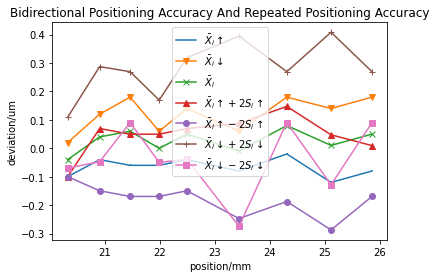

' target_position1=6.711 \npositive_deviations_list1=[2.3,2.1,1.9,2.8,2.2] #正向距离偏差列表\nnegative_deviations_list1=[-1.2,-1.7,-1.9,-1.3,-1.9] #反向距离偏差列表\n\ntarget_position2=175.077 \npositive_deviations_list2=[3.6,3.5,3.1,3.7,3.2] #正向距离偏差列表\nnegative_deviations_list2=[-0.5,-0.9,-1.1,-0.2,-0.8] #反向距离偏差列表\n\ntarget_position3=353.834 \npositive_deviations_list3=[3.5,3.3,3.0,3.8,3.5] #正向距离偏差列表\nnegative_deviations_list3=[0.2,-0.6,-0.7,0.1,-0.7,-0.3] #反向距离偏差列表\n\ntarget_position4=525.668 \npositive_deviations_list4=[3.0,2.7,2.4,3.2,2.6] #正向距离偏差列表\nnegative_deviations_list4=[-0.6,-1.2,-1.3,-0.3,-1.3] #反向距离偏差列表\n\ntarget_position5=704.175 \npositive_deviations_list5=[1.7,1.5,1.0,1.9,1.1] #正向距离偏差列表\nnegative_deviations_list5=[-1.9,-2.3,-2.9,-1.4,-2.3] #反向距离偏差列表\n\n\ntarget_position6=881.868 \npositive_deviations_list6=[0.4,0.2,-0.2,0.9,-0.1] #正向距离偏差列表\nnegative_deviations_list6=[-3.0,-3.5,-3.7,-2.8,-3.7] #反向距离偏差列表\n\ntarget_position7=1055.890 \npositive_deviations_list7=[-0.4,-0.7,-1.0,0,-0.9] #正向

In [17]:
import math
import matplotlib.pyplot as plt

#计算单向的平均位置偏差
def calcultate_mean_positional_deviation(deviations):
    n=len(deviations)
    mean=sum(deviations)/n
    return mean

#计算n次单向趋近获得的重复定位精度的估算值
#输入的是单向趋近某个位置时，n次位置偏差的值
def calculate_std_deviation(position_deviations):
    n = len(position_deviations)
    if n < 2:
        raise ValueError("位置列表应至少包含两个位置")
    mean = sum(position_deviations) / n
    deviations = [(position_deviation - mean) for position_deviation in position_deviations]
    variance = sum([deviation**2 for deviation in deviations]) / (n - 1)
    std_deviation = math.sqrt(variance)
    return std_deviation

def calculate_bidirectional_repeatability(target_position,positive_deviations_list,negative_deviations_list):
    mean_negative_positional_deviation=calcultate_mean_positional_deviation(negative_deviations_list)#反向平均位置偏差
    negative_std_deviation=calculate_std_deviation(negative_deviations_list)#反向重复定位精度估算值
    mean_positive_positional_deviation=calcultate_mean_positional_deviation(positive_deviations_list)#正向平均位置偏差
    positive_std_deviation=calculate_std_deviation(positive_deviations_list)#正向重复定位精度估算值


    mean_bidirectional_positional_deviation=(mean_positive_positional_deviation+mean_negative_positional_deviation)/2#双向平均位置偏差
    reversal_value=abs(mean_negative_positional_deviation-mean_positive_positional_deviation)#反向差值
    positive_repeatability=4*positive_std_deviation#
    negative_repeatability=4*negative_std_deviation
    bidirectional_repeatability=max(2*positive_std_deviation+2*negative_std_deviation+reversal_value,positive_repeatability,negative_repeatability)


    print("位置为"+str(target_position)+"时：")
    print("正向平均位置偏差为："+str(mean_positive_positional_deviation))
    print("反向平均位置偏差为："+str(mean_negative_positional_deviation))
    print("平均双向位置偏差："+str(mean_bidirectional_positional_deviation))

    print("正向标准不确定度为："+str(positive_std_deviation))
    print("反向标准不确定度为："+str(negative_std_deviation))

    print("双向重复定位精度："+str(bidirectional_repeatability))

    return mean_negative_positional_deviation,mean_positive_positional_deviation,mean_bidirectional_positional_deviation,mean_negative_positional_deviation+2*negative_std_deviation,mean_negative_positional_deviation-2*negative_std_deviation,mean_positive_positional_deviation+2*positive_std_deviation,mean_positive_positional_deviation-2*positive_std_deviation,bidirectional_repeatability


target_position1=20.3241 #对应能量300
positive_deviations_list1=[0.1,0,0,0,0] #正向距离偏差列表
negative_deviations_list1=[-0.1,-0.1,-0.1,-0.1,-0.1] #反向距离偏差列表

target_position2=20.9057 #对应能量310
positive_deviations_list2=[0.1,0.2,0.2,0.1,0] #正向距离偏差列表
negative_deviations_list2=[-0.1,-0.1,0,0,0] #反向距离偏差列表

target_position3=21.4597 #对应能量320
positive_deviations_list3=[0.2,0.2,0.2,0.2,0.1] #正向距离偏差列表
negative_deviations_list3=[-0.1,-0.1,0,0,-0.1] #反向距离偏差列表

target_position4=21.9883 #对应能量330
positive_deviations_list4=[0.1,0,0.1,0.0,0.1] #正向距离偏差列表
negative_deviations_list4=[-0.1,0,-0.1,-0.1,0] #反向距离偏差列表

target_position5=22.4933 #对应能量340
positive_deviations_list5=[0.2,0.2,0.1,0.2,0] #正向距离偏差列表
negative_deviations_list5=[-0.1,0,0,0,-0.1] #反向距离偏差列表


target_position6=23.4394 #对应能量360
positive_deviations_list6=[0.2,0.1,0.2,-0.2,0] #正向距离偏差列表
negative_deviations_list6=[-0.2,-0.1,0,0,-0.1] #反向距离偏差列表

target_position7=24.3095#对应能量380
positive_deviations_list7=[0.2,0.2,0.2,0.2,0.1] #正向距离偏差列表
negative_deviations_list7=[0.1,-0.1,-0.1,0,0] #反向距离偏差列表

target_position8=25.1135#对应能量400
positive_deviations_list8=[0.2,0.2,0.2,-0.1,0.2] #正向距离偏差列表
negative_deviations_list8=[-0.1,-0.2,-0.1,0,-0.2] #反向距离偏差列表

target_position9=25.8591#对应能量420
positive_deviations_list9=[0.2,0.2,0.2,0.2,0.1] #正向距离偏差列表
negative_deviations_list9=[-0.1,-0.1,-0.1,0,-0.1] #反向距离偏差列表

list1=calculate_bidirectional_repeatability(target_position1,positive_deviations_list1,negative_deviations_list1)
list2=calculate_bidirectional_repeatability(target_position2,positive_deviations_list2,negative_deviations_list2)
list3=calculate_bidirectional_repeatability(target_position3,positive_deviations_list3,negative_deviations_list3)
list4=calculate_bidirectional_repeatability(target_position4,positive_deviations_list4,negative_deviations_list4)
list5=calculate_bidirectional_repeatability(target_position5,positive_deviations_list5,negative_deviations_list5)
list6=calculate_bidirectional_repeatability(target_position6,positive_deviations_list6,negative_deviations_list6)
list7=calculate_bidirectional_repeatability(target_position7,positive_deviations_list7,negative_deviations_list7)
list8=calculate_bidirectional_repeatability(target_position8,positive_deviations_list8,negative_deviations_list8)
list9=calculate_bidirectional_repeatability(target_position9,positive_deviations_list9,negative_deviations_list9)




positionList=[target_position1,target_position2,target_position3,target_position4,target_position5,target_position6,target_position7,target_position8,target_position9]
mean_negative_positional_deviation_list=[list1[0],list2[0],list3[0],list4[0],list5[0],list6[0],list7[0],list8[0],list9[0]]
mean_positive_positional_deviation=[list1[1],list2[1],list3[1],list4[1],list5[1],list6[1],list7[1],list8[1],list9[1]]
mean_bidirectional_positional_deviation=[list1[2],list2[2],list3[2],list4[2],list5[2],list6[2],list7[2],list8[2],list9[2]]
negative_plus_list=[list1[3],list2[3],list3[3],list4[3],list5[3],list6[3],list7[3],list8[3],list9[3]]
negative_minor_list=[list1[4],list2[4],list3[4],list4[4],list5[4],list6[4],list7[4],list8[4],list9[4]]
positive_plus_list=[list1[5],list2[5],list3[5],list4[5],list5[5],list6[5],list7[5],list8[5],list9[5]]
positive_minor_list=[list1[6],list2[6],list3[6],list4[6],list5[6],list6[6],list7[6],list8[6],list9[6]]
bidirectional_repeatability_list=[list1[7],list2[7],list3[7],list4[7],list5[7],list6[7],list7[7],list8[7],list9[7]]


plt.plot(positionList, mean_negative_positional_deviation_list, label=r'$\bar{X}_{i} \uparrow$',marker=',')
plt.plot(positionList, mean_positive_positional_deviation, label=r'$\bar{X}_{i} \downarrow$',marker='v')

plt.plot(positionList, mean_bidirectional_positional_deviation, label=r'$\bar{X}_{i}$',marker='x')
plt.plot(positionList, negative_plus_list, label=r'$\bar{X}_{i} \uparrow+2 S_{i} \uparrow$',marker= '^')

plt.plot(positionList, negative_minor_list, label=r'$\bar{X}_{i} \uparrow-2 S_{i} \uparrow$',marker= 'o')
plt.plot(positionList, positive_plus_list, label=r'$\bar{X}_{i} \downarrow+2 S_{i} \downarrow$',marker= '+')
plt.plot(positionList, positive_minor_list, label=r'$\bar{X}_{i} \downarrow-2 S_{i} \downarrow$',marker= 's')

plt.xlabel('position/mm')
plt.ylabel('deviation/um')

# 添加标题
plt.title('Bidirectional Positioning Accuracy And Repeated Positioning Accuracy')

# 添加图例
plt.legend()

# 显示图像
plt.show()






#引用自GB/T 17421.2-2016/ISO 230-2:2006 的示例数据，可替换上面的数据，绘制图像与结果与文件中的结果一致，证明程序的正确性
""" target_position1=6.711 
positive_deviations_list1=[2.3,2.1,1.9,2.8,2.2] #正向距离偏差列表
negative_deviations_list1=[-1.2,-1.7,-1.9,-1.3,-1.9] #反向距离偏差列表

target_position2=175.077 
positive_deviations_list2=[3.6,3.5,3.1,3.7,3.2] #正向距离偏差列表
negative_deviations_list2=[-0.5,-0.9,-1.1,-0.2,-0.8] #反向距离偏差列表

target_position3=353.834 
positive_deviations_list3=[3.5,3.3,3.0,3.8,3.5] #正向距离偏差列表
negative_deviations_list3=[0.2,-0.6,-0.7,0.1,-0.7,-0.3] #反向距离偏差列表

target_position4=525.668 
positive_deviations_list4=[3.0,2.7,2.4,3.2,2.6] #正向距离偏差列表
negative_deviations_list4=[-0.6,-1.2,-1.3,-0.3,-1.3] #反向距离偏差列表

target_position5=704.175 
positive_deviations_list5=[1.7,1.5,1.0,1.9,1.1] #正向距离偏差列表
negative_deviations_list5=[-1.9,-2.3,-2.9,-1.4,-2.3] #反向距离偏差列表


target_position6=881.868 
positive_deviations_list6=[0.4,0.2,-0.2,0.9,-0.1] #正向距离偏差列表
negative_deviations_list6=[-3.0,-3.5,-3.7,-2.8,-3.7] #反向距离偏差列表

target_position7=1055.890 
positive_deviations_list7=[-0.4,-0.7,-1.0,0,-0.9] #正向距离偏差列表
negative_deviations_list7=[-3.7,-4.3,-4.6,-3.6,-4.5] #反向距离偏差列表 """


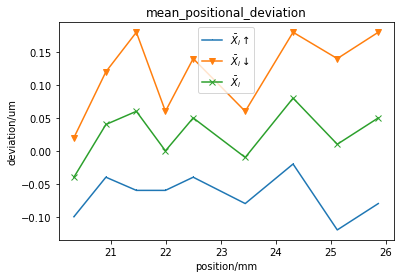

In [18]:
plt.plot(positionList, mean_negative_positional_deviation_list, label=r'$\bar{X}_{i} \uparrow$',marker=',')
plt.plot(positionList, mean_positive_positional_deviation, label=r'$\bar{X}_{i} \downarrow$',marker='v')
plt.plot(positionList, mean_bidirectional_positional_deviation, label=r'$\bar{X}_{i}$',marker='x')
plt.xlabel('position/mm')
plt.ylabel('deviation/um')

# 添加标题
plt.title('mean_positional_deviation')
# 添加图例
plt.legend()

# 显示图像
plt.show()

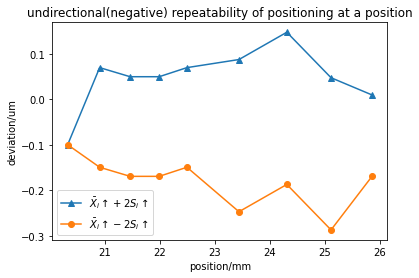

In [19]:
plt.plot(positionList, negative_plus_list, label=r'$\bar{X}_{i} \uparrow+2 S_{i} \uparrow$',marker= '^')
plt.plot(positionList, negative_minor_list, label=r'$\bar{X}_{i} \uparrow-2 S_{i} \uparrow$',marker= 'o')
plt.xlabel('position/mm')
plt.ylabel('deviation/um')

# 添加标题
plt.title('undirectional(negative) repeatability of positioning at a position')
# 添加图例
plt.legend()

# 显示图像
plt.show()

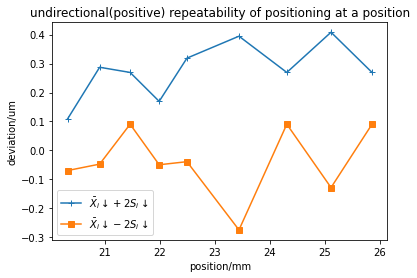

In [20]:
plt.plot(positionList, positive_plus_list, label=r'$\bar{X}_{i} \downarrow+2 S_{i} \downarrow$',marker= '+')
plt.plot(positionList, positive_minor_list, label=r'$\bar{X}_{i} \downarrow-2 S_{i} \downarrow$',marker= 's')
plt.xlabel('position/mm')
plt.ylabel('deviation/um')

# 添加标题
plt.title('undirectional(positive) repeatability of positioning at a position')
# 添加图例
plt.legend()

# 显示图像
plt.show()

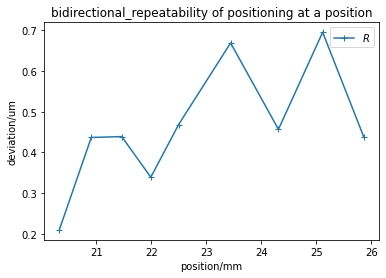

In [21]:
plt.plot(positionList, bidirectional_repeatability_list, label=r'$R$',marker= '+')
plt.xlabel('position/mm')
plt.ylabel('deviation/um')

# 添加标题
plt.title('bidirectional_repeatability of positioning at a position')
# 添加图例
plt.legend()

# 显示图像
plt.show()
